# IN269 Kecerdasan Bisnis
## Pertemuan 12: Regression Assumptions & Diagnostics

## 9.1 Introduction
- Linear regression makes several assumptions about the data at hand.
- This chapter describes regression assumptions and provides built-in plots for regression diagnostics in R programming language.

After performing a regression analysis, you should always check if the model works well for the data at hand.

A first step of this regression diagnostic is to inspect the significance of the regression beta coefficients, as well as, the $R^2$ that tells us how well the linear regression model fits to the data. 

Dalam pertemuan kali ini, you will learn additional steps to evaluate how well the model fits the data.

- For example, the linear regression model makes the assumption that the relationship between the predictors ($x$) and the outcome variable is linear. 
- This might not be true. The relationship could be polynomial or logarithmic.



Additionally, the data might contain some influential observations, such as outliers (or extreme values), that can affect the result of the regression.



Therefore, you should closely diagnostic the regression model that you built in order to detect potential problems and to check whether the assumptions made by the linear regression model are met or not.

To do so, we generally examine the distribution of residuals errors , that can tell you more about your data.

Dalam Pertemuan ini:
1. we start by explaining residuals errors and fitted values.
2. next, we present linear regresion assumptions , as well as, potential problems you can face when performing regression analysis.
3. finally, we describe some built-in diagnostic plots in R for testing the assumptions underlying linear regression model.

## 9.2 Loading Required R packages
- `tidyverse` for easy data manipulation and visualization
- `broom` : creates a tidy data frame from statistical test results

In [14]:
library(ISLR2)
library(MASS)

ERROR: Error in library(ISLR2): there is no package called 'ISLR2'


In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(broom)

## 9.3 Example of Data
We'll use the data set `marketing` from [datarium](https://github.com/kassambara/datarium).

In [4]:
load("marketing.rda")

In [5]:
head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [6]:
sample_n(marketing, 3)

youtube,facebook,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
117.00,9.12,8.64,11.64
298.56,32.52,27.48,22.68
261.24,40.20,70.80,23.28


## 9.4 Building a regression model
We build a model to predict sales on the basis of advertising budget spent in youtube medias.

In [7]:
model <- lm(sales ~ youtube, data = marketing)

In [8]:
model


Call:
lm(formula = sales ~ youtube, data = marketing)

Coefficients:
(Intercept)      youtube  
    8.43911      0.04754  


Our regression equation is:
$$
    y = 8.43 + 0.0475 \times x
$$

## Fitted Values and Residuals
- The **fitted** (or **predicted** ) values are the y-values that you would expect for the given x-values according to the built regression model (or visually, the best-fitting straight regression line).
- In our example, for a given youtube advertising budget, the fitted (predicted) sales value would be, $\text{sales} = 8.44 + 0.0048*\text{youtube}$.

- From the scatter plot below, it can be seen that not all the data points fall exactly on the estimated regression line. 
- This means that, for a given youtube advertising budget, the observed (or measured) sale values can be different from the predicted sale values. 
- The difference is called the **residual errors**, represented by a vertical red lines.

<center>
<img src="images/error-terms.png" width="700"/>
</center>    

- In R, you can easily augment your data to add fitted values and residuals by using the function `augment()` [broom package]. 
- Let's call the output model.diag.metrics because it contains several metrics useful for regression diagnostics.

In [9]:
model.diag.metrics <- augment(model)

In [ ]:
head(model.diag.metrics)

sales,youtube,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.52,276.12,21.564929,4.9550706,0.009703067,3.904215,7.943433e-03,1.27334860
12.48,53.40,10.977569,1.5024311,0.012168549,3.918820,9.204340e-04,0.38657462
11.16,20.64,9.420269,1.7397315,0.016493630,3.918307,1.687550e-03,0.44861503
22.20,181.80,17.081273,5.1187265,0.005013546,3.903214,4.338753e-03,1.31230121
15.48,216.96,18.752662,-3.2726618,0.005776898,3.913319,2.046726e-03,-0.83934283
8.64,10.44,8.935395,-0.2953948,0.018047722,3.920242,5.340448e-05,-0.07623209


Among the table columns, there are:

- `youtube` : the invested youtube advertising budget
- `sales` : the observed sale values
- `.fitted` : the fitted sale values
- `.resid` : the residual errors      
Lainnya kita bahas di slides berikutnya

- The following R code plots the residuals error (in red color) between observed values and the fitted regression line. 
- Each vertical red segments represents the residual error between an observed sale value and the corresponding predicted (i.e. fitted) value.

`geom_smooth()` using formula = 'y ~ x'


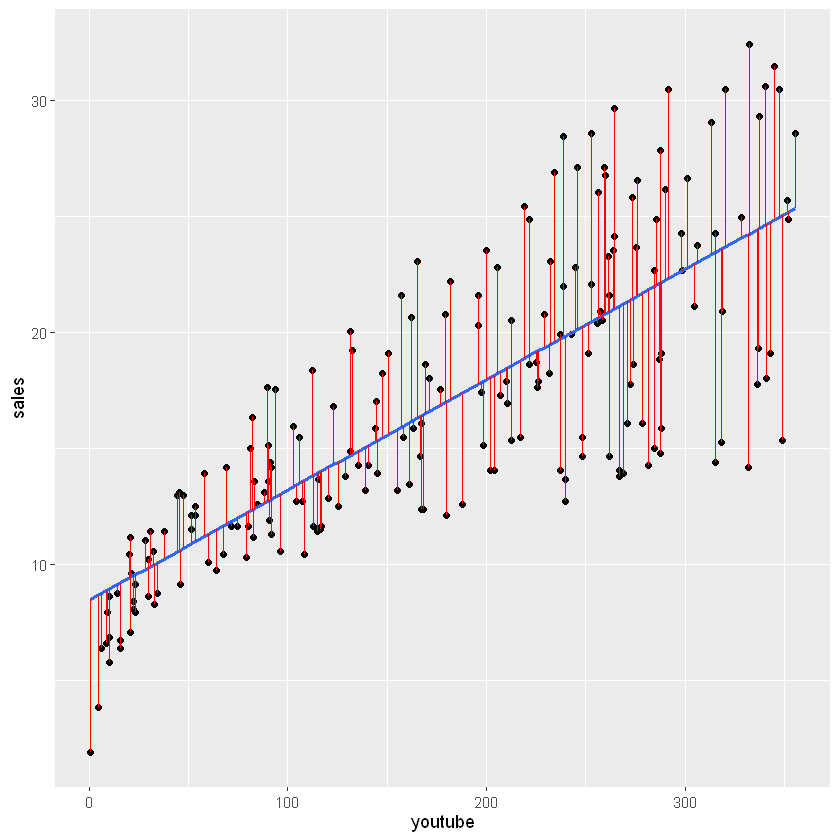

In [11]:
ggplot(model.diag.metrics, aes(youtube, sales)) + 
geom_point() +
stat_smooth(method = lm, se=FALSE) +
geom_segment(aes(xend = youtube, yend =.fitted), color ="red", linewidth =0.3 )

<div class="alert alert-block alert-info">
    <b>Tip:</b> In order to check regression assumptions, we'll examine the distribution of residuals.
</div>

## Regression Assumptions
Linear regression makes several assumptions about the data, such as :
1. **Linearity of the data**. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.
2. **Normality of residuals**. The residual errors are assumed to be normally distributed.      
3. **Homogeneity of residuals variance**. The residuals are assumed to have a constant variance    (**homoscedasticity**)
4. **Independence of residuals error terms**.


| Assumption           | Why It Matters                       | What Fails When Violated               |
| -------------------- | ------------------------------------ | -------------------------------------- |
| **Linearity**        | Model form must match data           | Biased coefficients & poor predictions |
| **Normality**        | Valid t-tests, F-tests, CIs          | Incorrect p-values and CIs             |
| **Homoscedasticity** | Correct standard errors              | Misleading significance tests          |
| **Independence**     | Valid inference & proper uncertainty | Underestimated SEs; false significance |


### Homoscedasticity (constant variance) [(Molnar, 2025)](https://christophm.github.io/interpretable-ml-book/limo.html)
- The variance of the error terms is assumed to be constant over the entire feature space. 
- Suppose you want to predict the value of a house given the living area in square meters. 
- You estimate a linear model that assumes that, regardless of the size of the house, the error around the predicted response has the same variance. 
- This assumption is often violated in reality. 
- In the house example, it’s plausible that the variance of error terms around the predicted price is higher for larger houses since with higher prices there is more room for price fluctuations. 
- Suppose the average error (difference between predicted and actual price) in your linear regression model is 50,000 Euros. 
- If you assume homoscedasticity, you assume that the average error of 50,000 is the same for houses that cost 1 million and for houses that cost only 40,000. 
- This is unreasonable because it would mean that we can expect negative house prices.

You should check whether or not these assumptions hold true. Potential problems include:
1. **Non-linearity** of the outcome - predictor relationships
2. **Heteroscedasticity** : Non-constant variance of error terms
3. **Presence of influential values** in the data that can be:
   - Outliers: extreme values in the outcome (y) variable
   - High-leverage points: extreme values in the predictors (x) variable

All these assumptions and potential problems can be checked by producing some diagnostic plots visualizing the residual errors.


## Regression diagnostics
### Diagnostic plots
Regression diagnostics plots can be created using the R base function plot() or the autoplot() function [ggfortify package], which creates a ggplot2-based graphics.

- Create the diagnostic plots with the R base function:

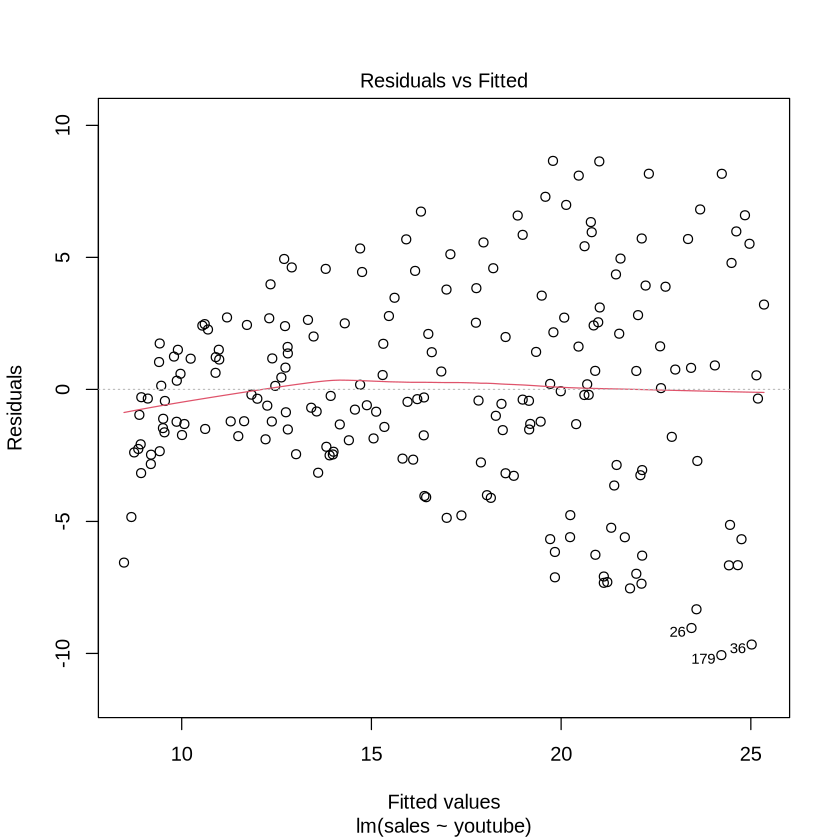

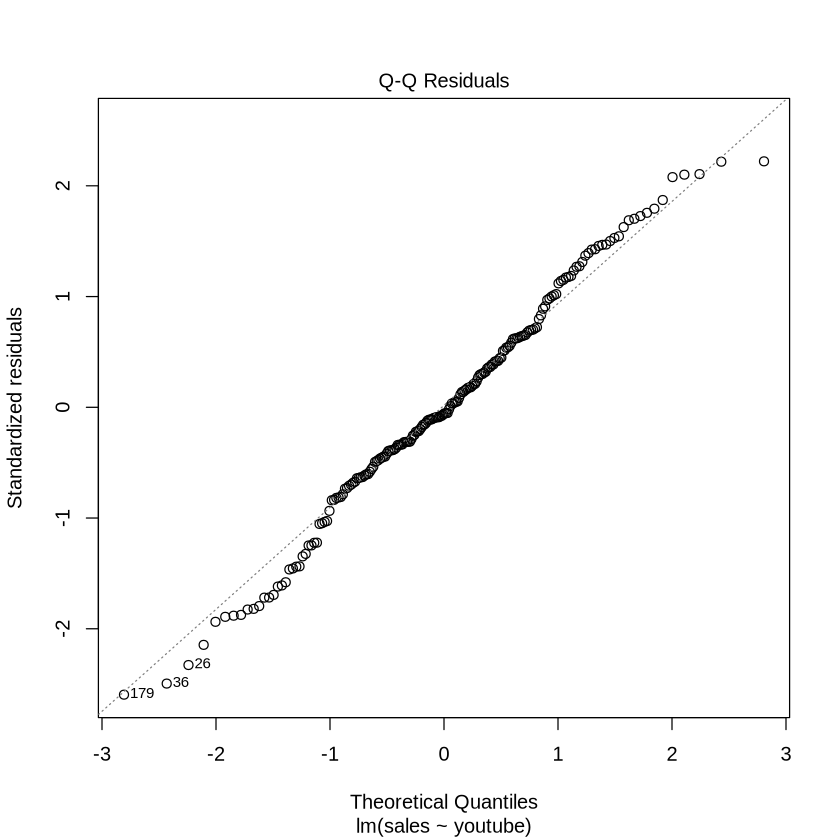

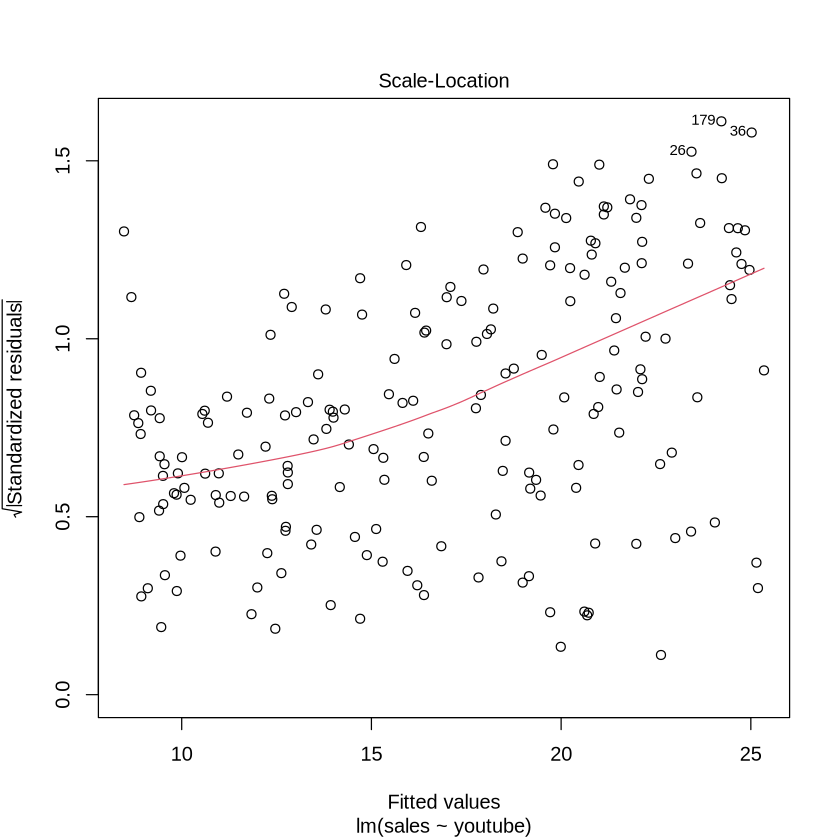

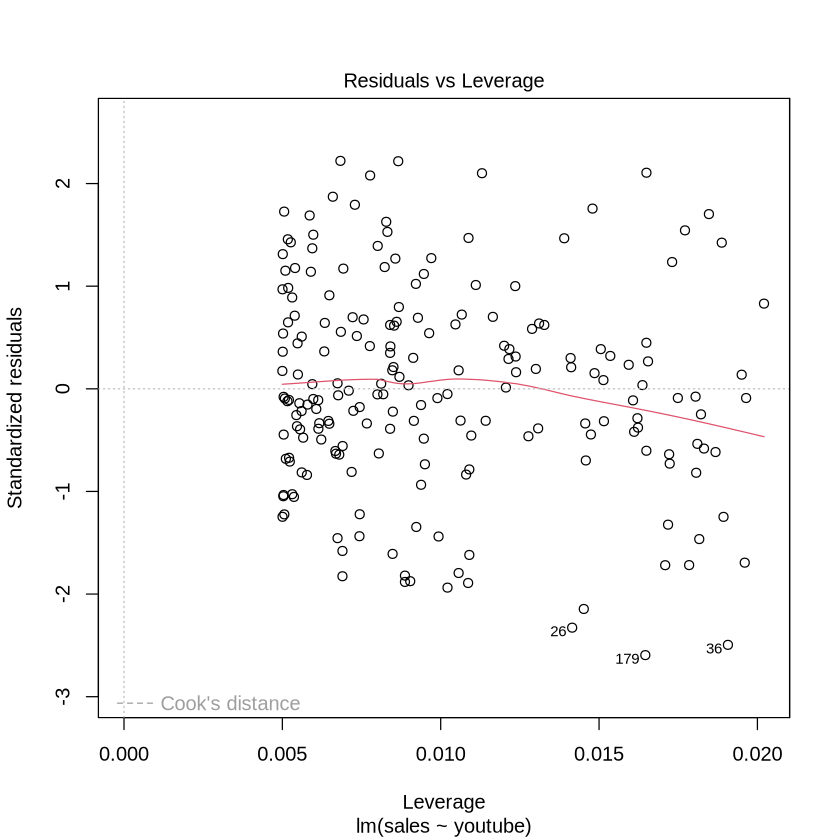

In [12]:
plot(model)

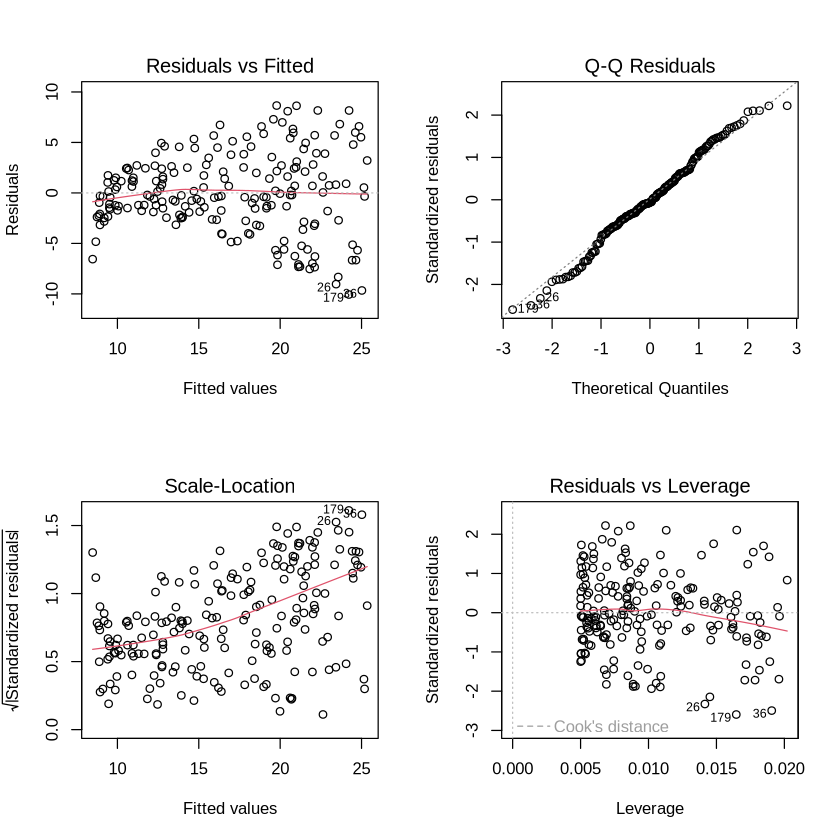

In [13]:
par(mfrow = c(2,2))
plot(model)

- Create the diagnostic plots using ggfortify:

In [14]:
library(ggfortify)

Warning message:
“`fortify(<lm>)` was deprecated in ggplot2 4.0.0.
ℹ Please use `broom::augment(<lm>)` instead.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”


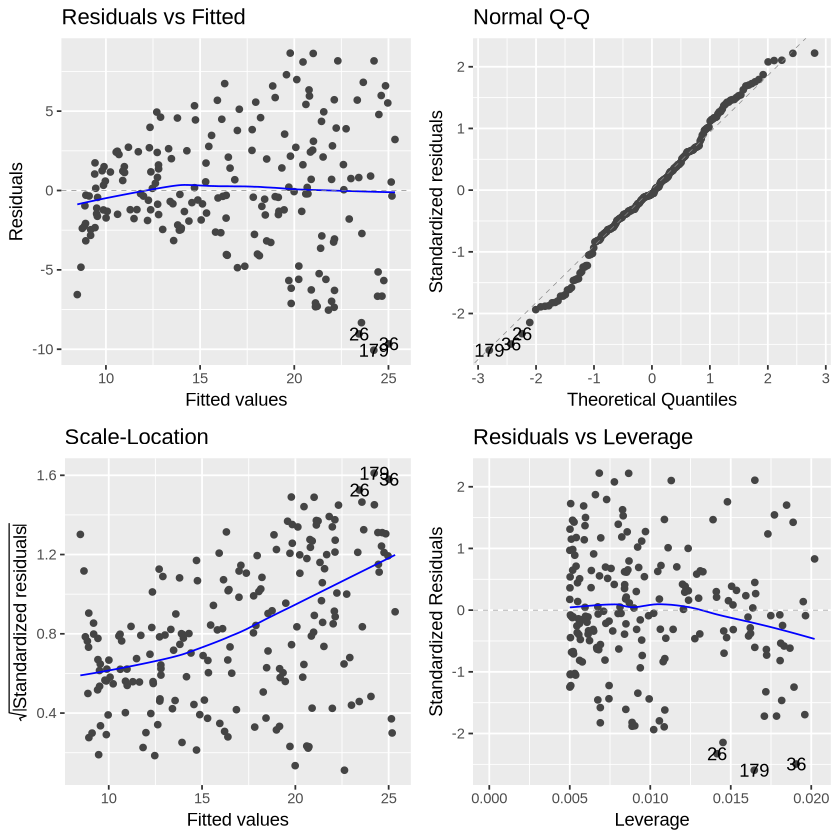

In [15]:
autoplot(model)

The diagnostic plots show residuals in four different ways:

1. **Residuals vs Fitted**. Used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good.
2. **Normal Q-Q**. Used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.
3. **Scale-Location** (or Spread-Location). Used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity. This is not the case in our example, where we have a heteroscedasticity problem.
4. **Residuals vs Leverage**. Used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. 

The metrics used to create the above plots are available in the `model.diag.metrics` data, described in the previous section.

In [16]:
head(model.diag.metrics)

sales,youtube,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26.52,276.12,21.564929,4.9550706,0.009703067,3.904215,7.943433e-03,1.27334860
12.48,53.40,10.977569,1.5024311,0.012168549,3.918820,9.204340e-04,0.38657462
11.16,20.64,9.420269,1.7397315,0.016493630,3.918307,1.687550e-03,0.44861503
22.20,181.80,17.081273,5.1187265,0.005013546,3.903214,4.338753e-03,1.31230121
15.48,216.96,18.752662,-3.2726618,0.005776898,3.913319,2.046726e-03,-0.83934283
8.64,10.44,8.935395,-0.2953948,0.018047722,3.920242,5.340448e-05,-0.07623209


In [17]:
# drop some columns (.sigma) for simplification
model.diag.metrics <- model.diag.metrics %>% mutate(index =1:nrow(model.diag.metrics)) %>% 
select(index, everything(), -.sigma)

In [18]:
# Inspect the data
head(model.diag.metrics, 4)

index,sales,youtube,.fitted,.resid,.hat,.cooksd,.std.resid
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26.52,276.12,21.564929,4.955071,0.009703067,0.007943433,1.2733486
2,12.48,53.40,10.977569,1.502431,0.012168549,0.000920434,0.3865746
3,11.16,20.64,9.420269,1.739731,0.016493630,0.001687550,0.4486150
4,22.20,181.80,17.081273,5.118727,0.005013546,0.004338753,1.3123012


We'll use mainly the following columns:

- `fitted` : fitted values
- `resid` : residual errors
- `hat` : hat values, used to detect high-leverage points (or extreme values in the predictors x variables)
- `std.resid` : standardized residuals, which is the residuals divided by their standard errors.      
    Used to detect outliers (or extreme values in the outcome y variable)
- `cooksd` : Cook's distance, used to detect influential values, which can be an outlier or a high leverage point

In the following section, we'll describe, in details, how to use these graphs and metrics to check the regression assumptions and to diagnostic potential problems in the model.

### Linearity of the Data
The linearity assumption can be checked by inspecting the Residuals vs Fitted plot (1st plot):

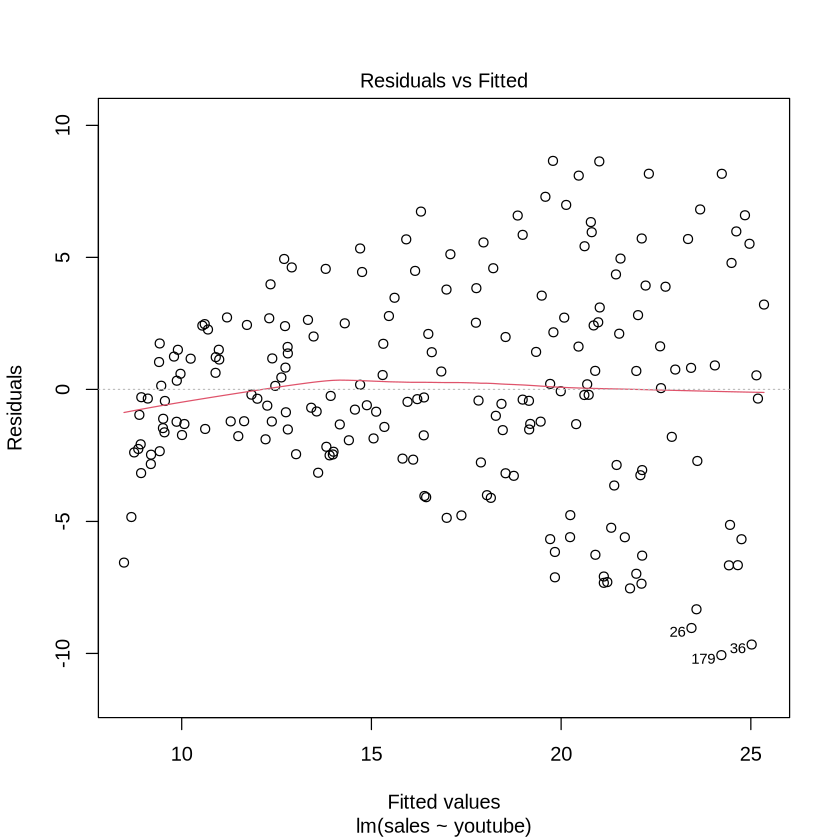

In [19]:
plot(model, 1)

Ideally, the residual plot will show no fitted pattern. That is, the red line should be approximately horizontal at zero. The presence of a pattern may indicate a problem with some aspect of the linear model.

<div class="alert alert-box alert-info">
    In our example, <b>there is no pattern in the residual plot</b>. This suggests that we can assume linear relationship between the predictors and the outcome variables.
</div>    

<div class="alert alert-block alert-success">
    Note that, if the residual plot indicates a non-linear relationship in the data, then a simple approach is to use non-linear transformations of the predictors, such as $\log(x)$, $\sqrt{x}$ and $x^2$, in the regression model.
</div>    

### Homogeneity of variance
This assumption can be checked by examining the ***scale-location*** plot , also known as the spread-location plot .

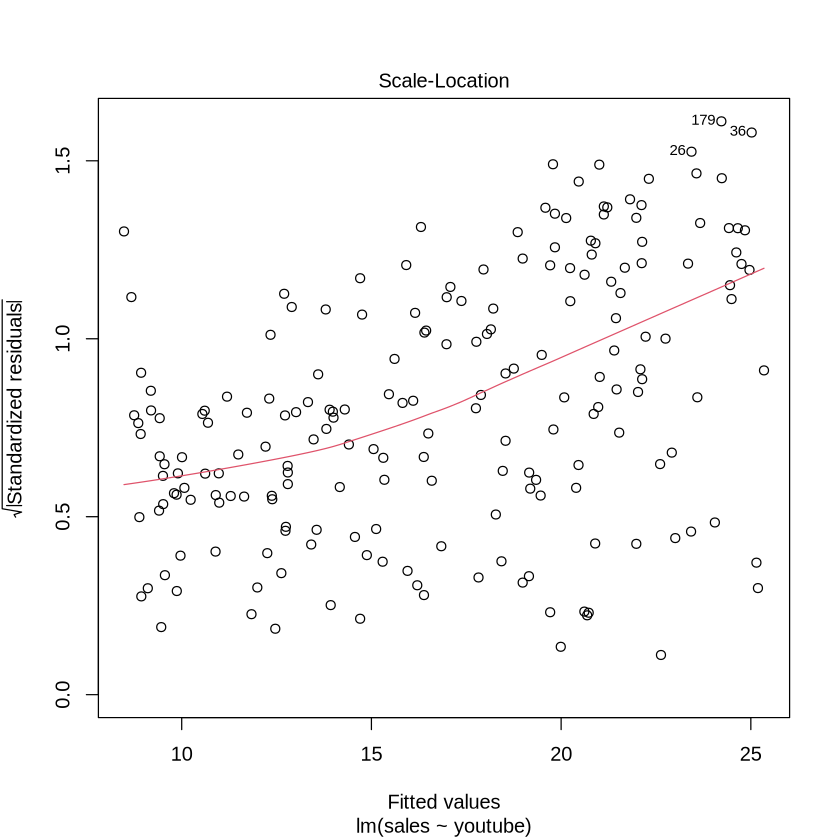

In [20]:
plot(model, 3)

- This plot shows if residuals are spread equally along the ranges of predictors. 
- It’s good if you see a horizontal line with equally spread points. In our example, this is not the case.

- It can be seen that the variability (variances) of the residual points increases with the value of the fitted outcome variable, suggesting non-constant variances in the residuals errors (or heteroscedasticity ).



<div class="alert alert-block alert-warning">
    A possible solution to reduce the heteroscedasticity problem is to <b>use a log or square root transformation of the outcome variable</b> ($y$).
</div>    

In [21]:
model2 <- lm(log(sales) ~ youtube, data = marketing)

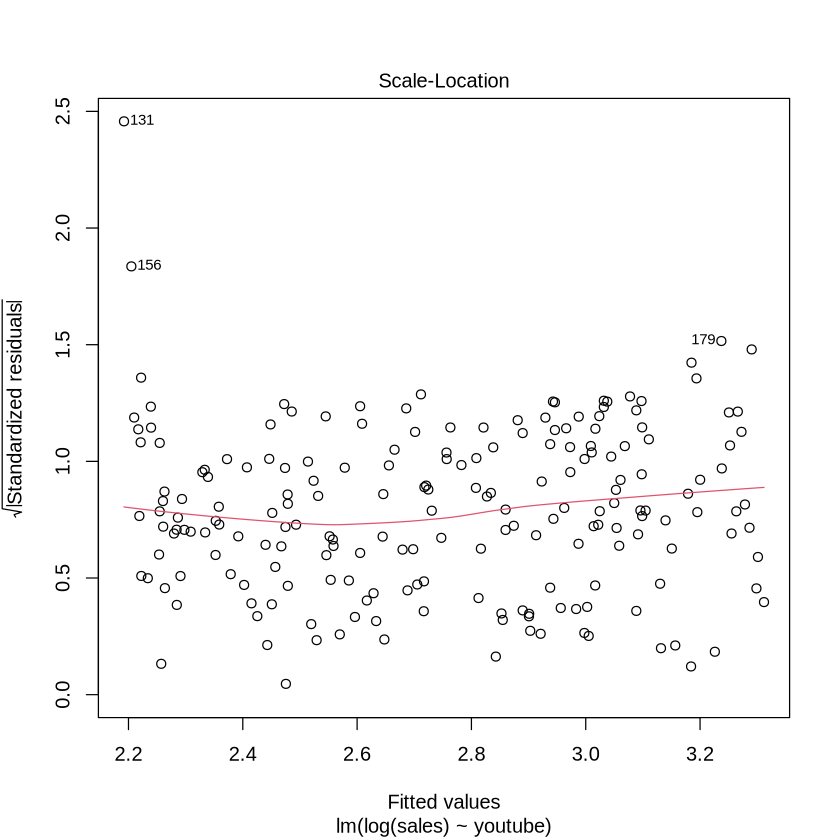

In [22]:
plot(model2,3)

### Normality of residuals
- The QQ plot of residuals can be used to visually check the normality assumption. 
- The normal probability plot of residuals should approximately follow a straight line.

<div class="alert alert-block alert-success">
In our example, <b>all the points fall approximately along this reference line, so we can assume normality</b>.
</div>



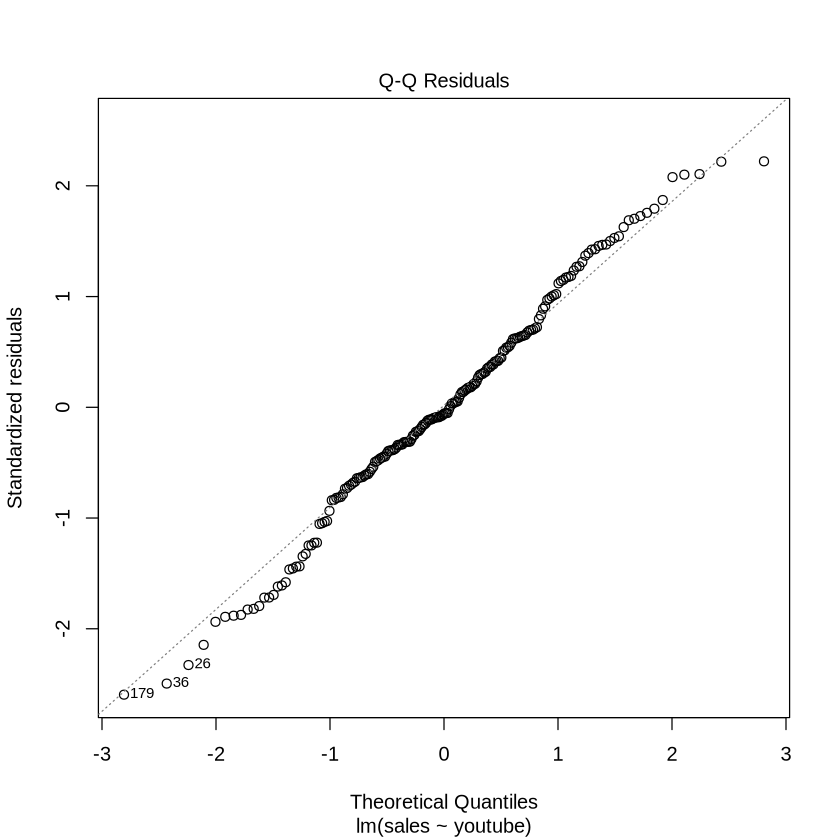

In [23]:
plot(model,2)

### Outliers and high leverage points
**Outliers** : An outlier is a point that has an extreme outcome variable value. The presence of outliers may affect the interpretation of the model, because it increases the MSE.

- Outliers can be identified by examining the _standardized residual_ (or _studentized residual_), which is the residual divided by its estimated standard error.     
 
> _Standardized residuals can be interpreted as the number of standard errors away from the regression line_.    

- Observations whose standardized residuals are greater than 3 in absolute value are possible outliers    

- **High leverage points**: A data point has high leverage, if it has extreme predictor x values. 
- This can be detected by examining the leverage statistic or the hat-value. 
- A value of this statistic above `2(p + 1)/n` indicates an observation with high leverage; where, `p` is the number of predictors and `n` is the number of observations.

Outliers and high leverage points can be identified by inspecting the **Residuals vs Leverage** plot:

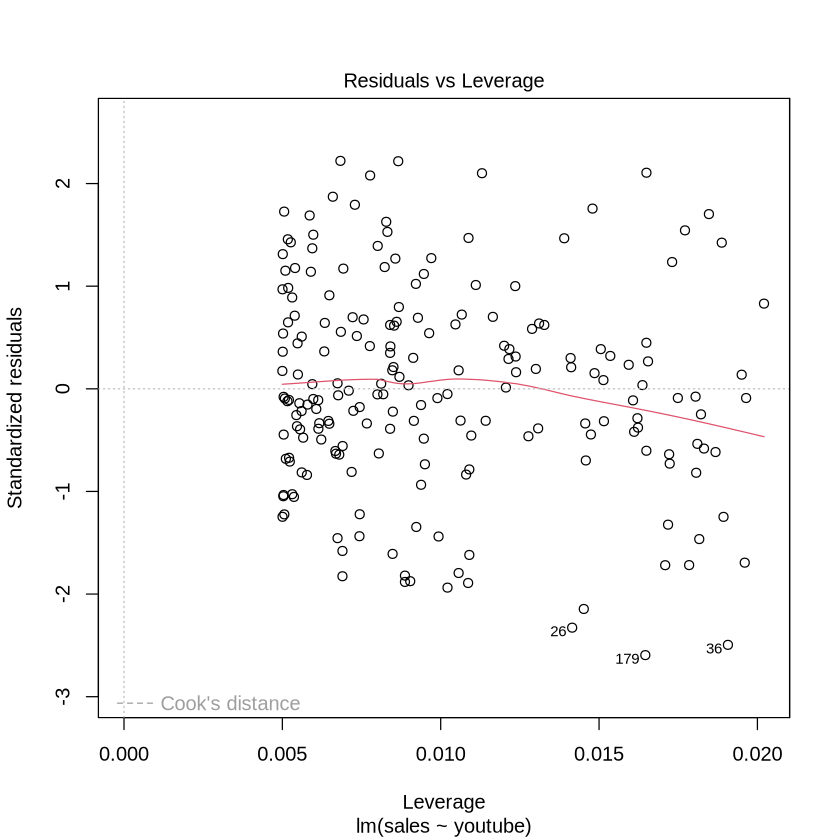

In [24]:
plot(model, 5)

<div class="alert alert-block alert-success">
    The plot above highlights the top 3 most extreme points (#26, #36 and #179), with a standardized residuals below -2. However, there is no outliers that exceed 3 standard deviations, what is good.

Additionally, there is no high leverage point in the data. That is, all data points, have a leverage statistic below `2(p + 1)/n = 4/200 = 0.02`.
</div>    

### Influential Values
- An influential value is a value, which inclusion or exclusion can alter the results of the regression analysis. Such a value is associated with a **large residual**.
- Not all outliers (or extreme data points) are influential in linear regression analysis.


- Statisticians have developed a metric called <u>Cook's distance</u> to determine the influence of a value. 
- This metric defines _influence as a combination of leverage and residual size_.


A rule of thumb is that an observation has **high influence** if Cook’s distance exceeds `4/(n - p - 1)`, where `n` is the number of observations and `p` the number of predictor variables.

In [25]:
4 / (200 - 1 - 1)

[1] 0.02020202

- The Residuals vs Leverage plot can help us to find influential observations if any. 
- On this plot, outlying values are generally located at the **upper right corner** or at the **lower right corner**. 
- Those spots are the places where data points can be influential against a regression line.

The following plots illustrate the Cook's distance and the leverage of our model:

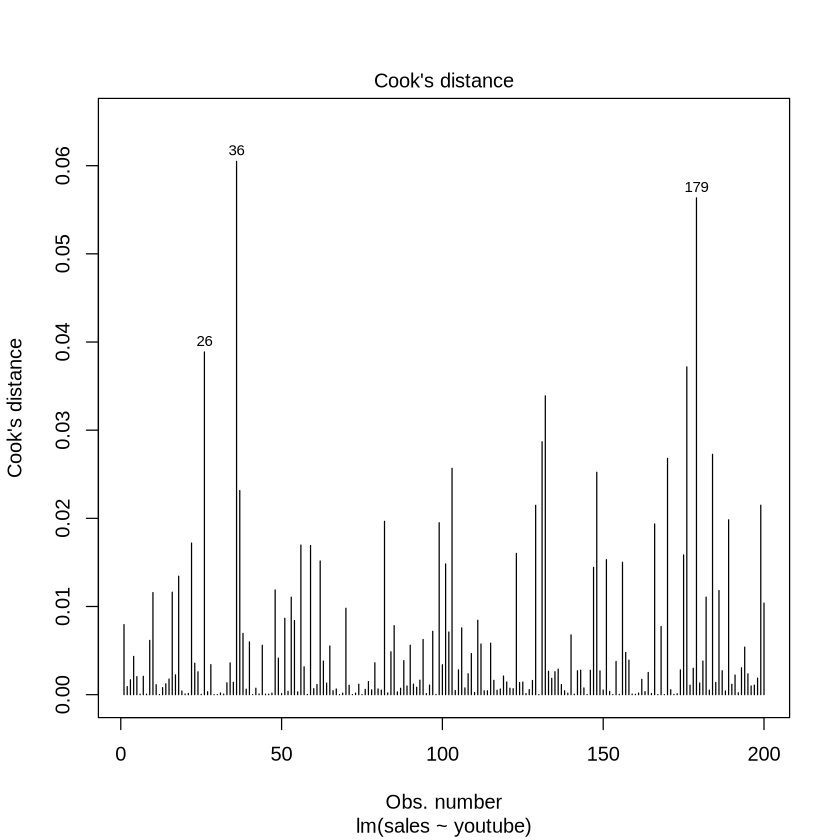

In [26]:
plot(model, 4)

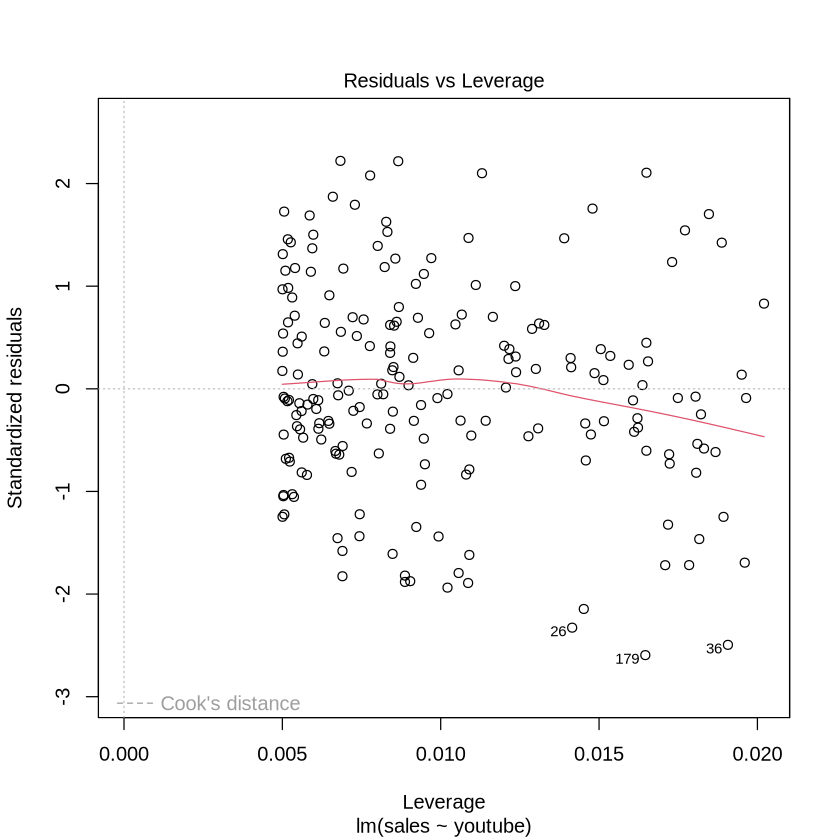

In [27]:
plot(model, 5)

- By default, the top 3 most extreme values are labelled on the Cook's distance plot. 
- If you want to label the top 5 extreme values, specify the option `id.n` as follow:



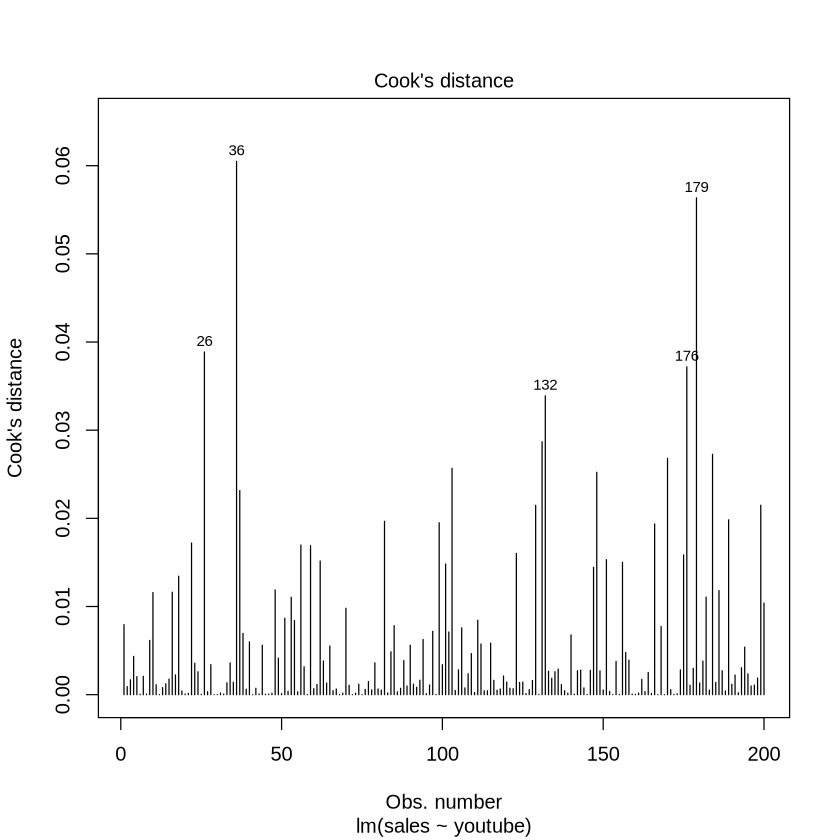

In [28]:
plot(model, 4, id.n=5)

If you want to look at these top 3 observations with the <u>highest Cook’s distance</u> in case you want to assess them further, type this R code:

In [29]:
model.diag.metrics %>% top_n(3, wt=.cooksd)

index,sales,youtube,.fitted,.resid,.hat,.cooksd,.std.resid
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,14.40,315.48,23.43597,-9.035972,0.01415107,0.03887305,-2.327287
36,15.36,348.84,25.02179,-9.661794,0.01906955,0.06049366,-2.494703
179,14.16,332.04,24.22318,-10.063178,0.01646090,0.05634703,-2.594894


<div class="alert alert-block alert-warning">
    When data points have high Cook's distance scores and are to the upper or lower right of the leverage plot, they have leverage meaning they are influential to the regression results. The regression results will be altered if we exclude those cases.
</div>    

<div class="alert alert-block alert-success">
In our example, the data don't present any influential points. Cook’s distance lines (a red dashed line) are not shown on the Residuals vs Leverage plot because all points are well inside of the Cook’s distance lines.
</div>    

Let's show now another example, where the data contain two extremes values with potential influence on the regression results:

In [30]:
df2 <- data.frame(x = c(marketing$youtube, 500, 600), 
                  y = c(marketing$sales, 80, 100))


In [31]:

model2 <- lm(y ~x, df2)

Create the Residuals vs Leverage plot of the two models:

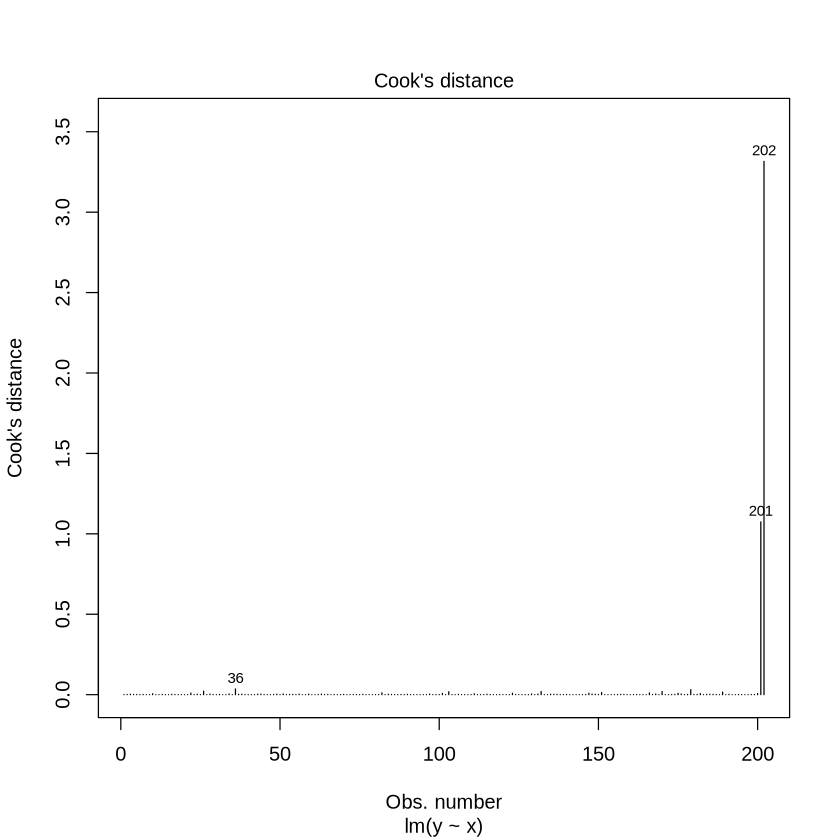

In [32]:
# Cook's distance
plot(model2, 4)

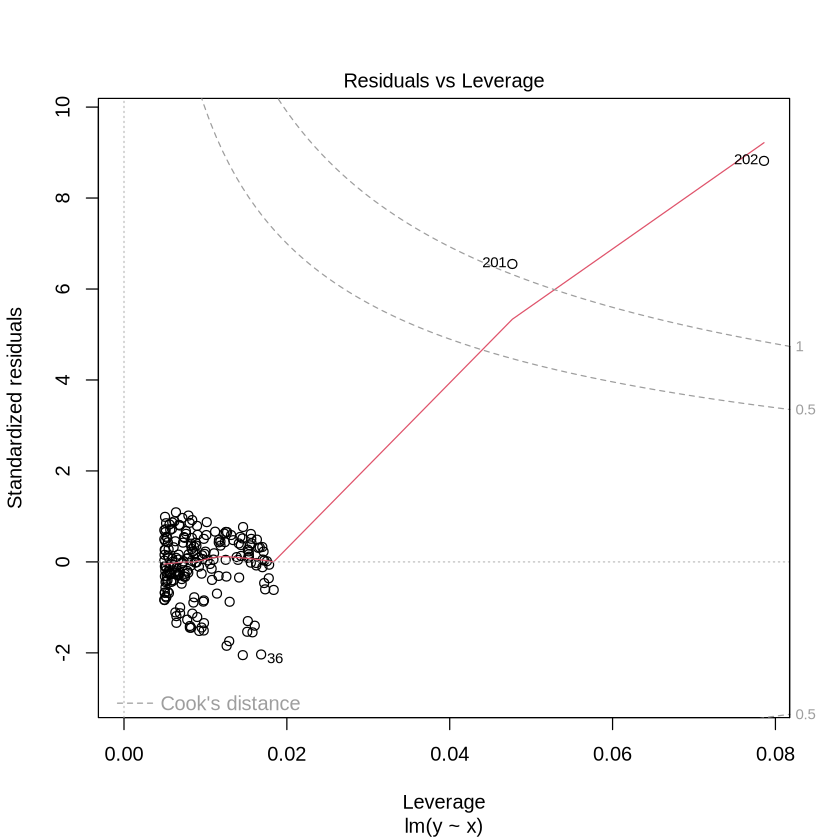

In [33]:
# Residuals vs Leverage
plot(model2, 5)

- On the Residuals vs Leverage plot, look for a data point outside of a dashed line, Cook’s distance. 
- When the points are outside of the Cook’s distance, this means that they have high Cook’s distance scores. 
- In this case, the values are influential to the regression results. The regression results will be altered if we exclude those cases.

- In the above example 2, **two data points are far beyond the Cook’s distance lines**. 
- The other residuals appear clustered on the left. The plot identified the influential observation as #201 and #202. 
- If you exclude these points from the analysis, the slope coefficient changes from 0.06 to 0.04 and $R^2$ from 0.5 to 0.6. Pretty big impact!

Pertemuan kali ini describes linear regression assumptions and shows how to diagnostic potential problems in the model.

- The diagnostic is essentially performed by visualizing the residuals. 
- Having patterns in residuals is not a stop signal. 
- Your current regression model might not be the best way to understand your data.

Potential problems might be:
- A non-linear relationships between the outcome and the predictor variables. When facing to this problem, one solution is to include a quadratic term, such as polynomial terms or log transformation.
- Existence of important variables that you left out from your model. Other variables you didn’t include (e.g., age or gender) may play an important role in your model and data.
- Presence of outliers. If you believe that an outlier has occurred due to an error in data collection and entry, then one solution is to simply remove the concerned observation.

### Latihan
1. Lakukan analisis yang sama untuk model regresi: 
$$
    \text{sales} = \beta_0 + \beta_1 \cdot \text{facebook}
$$  
2. Lakukan analisis yang sama untuk model regresi: 
$$
    \text{sales} = \beta_0 + \beta_1 \cdot \text{newspaper}
$$  

In [1]:
library(tidyverse)
library(caret)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [2]:
library(broom)

## Example of Data
We'll use the data set `marketing` from [datarium](https://github.com/kassambara/datarium).

In [3]:
load("marketing.rda")

In [4]:
head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [5]:
sample_n(marketing, 3)

youtube,facebook,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
21.48,45.12,25.92,9.60
45.84,4.44,16.56,9.12
263.76,40.20,54.12,23.52


In [6]:
set.seed(123)

training.samples <- marketing$sales %>% createDataPartition(p = 0.8, 
                                                            list =FALSE)
train.data  <- marketing[training.samples, ]
test.data <- marketing[-training.samples, ]

In [7]:
#model <- lm(sales ~ youtube + facebook + newspaper, data=train.data)

model <- lm (sales ~ ., data=train.data)


In [8]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.594141778,0.420814685,8.5409134,1.054115e-14
youtube,0.044635905,0.001552128,28.7578721,1.125356e-64
facebook,0.188823227,0.009528828,19.8159966,1.090250e-44
newspaper,0.002839757,0.006441963,0.4408217,6.599447e-01


From the output above, the coefficients table shows the beta coefficient estimates and their significance levels. Columns are:
- `Estimate`  : the intercept (b0) and the beta coefficient estimates associated to each predictor variable
- `Std.Error` : the standard error of the coefficient estimates. This represents the accuracy of the coefficients. The larger the standard error, the less confident we are about the estimate.
- `t value`   : the t-statistic, which is the coefficient estimate (column 2) divided by the standard error of the estimate (column 3)
- `Pr(>|t|)`  : The p-value corresponding to the t-statistic. The smaller the p-value, the more significant the estimate is.


You can easily make predictions using the R function `predict()` :

In [9]:
# New advertising budgets
newdata <-  data.frame(youtube = 2000, facebook = 1000, newspaper = 1000)

In [10]:
# Predict sales values
model %>% predict(newdata)

1 
284.5289

## Interpretation
- Before using a model for predictions, you need to assess the statistical significance of the model. 
- This can be easily checked by displaying the statistical summary of the model.

### Model Summary
Display the statistical summary of the model as follow:


In [11]:
summary(model)


Call:
lm(formula = sales ~ ., data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7142  -0.9939   0.3684   1.4494   3.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.594142   0.420815   8.541 1.05e-14 ***
youtube     0.044636   0.001552  28.758  < 2e-16 ***
facebook    0.188823   0.009529  19.816  < 2e-16 ***
newspaper   0.002840   0.006442   0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 158 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8935 
F-statistic: 451.2 on 3 and 158 DF,  p-value: < 2.2e-16


The summary outputs shows 6 components, including:
- **Call**. Shows the function call used to compute the regression model.
- **Residuals**. Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.
- **Coefficients**. Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.
- **Residual standard error** (RSE), **R-squared** ($R^2$) and the **F-statistic** are metrics that are used to check how well the model fits to our data.

The first step in interpreting the multiple regression analysis is to examine the F-statistic and the associated p-value, at the bottom of model summary. 
<div class="alert alert-block alert-warning">
    In our example, it can be seen that p-value of the F-statistic is < 2.2e-16, which is highly significant. This means that, at least, one of the predictor variables is significantly related to the outcome variable.
</div>    

### Coefficients significance
To see which predictor variables are significant, you can examine the coefficients table, which shows the estimate of regression beta coefficients and the associated t-statistic p-values.

In [12]:
summary(model)


Call:
lm(formula = sales ~ ., data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7142  -0.9939   0.3684   1.4494   3.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.594142   0.420815   8.541 1.05e-14 ***
youtube     0.044636   0.001552  28.758  < 2e-16 ***
facebook    0.188823   0.009529  19.816  < 2e-16 ***
newspaper   0.002840   0.006442   0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.043 on 158 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8935 
F-statistic: 451.2 on 3 and 158 DF,  p-value: < 2.2e-16


For a given the predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

<div class="alert alert-block alert-warning">
It can be seen that, changing in youtube and facebook advertising budget are significantly associated to changes in sales while changes in newspaper budget is not significantly associated with sales.
</div>

- For a given predictor variable, the coefficient ($\beta$) can be interpreted as the average effect on $y$ of a one unit increase in predictor, holding all other predictors fixed.
- For example, for a fixed amount of youtube and newspaper advertising budget, spending an additional 1000 dollars on facebook advertising leads to an increase in sales by approximately 0.1885*1000 = 189 sale units, on average.
- The youtube coefficient suggests that for every 1000 dollars increase in youtube advertising budget, holding all other predictors constant, we can expect an increase of 0.045*1000 = 45 sales units, on average.

- We found that newspaper is not significant in the multiple regression model. 
- This means that, for a fixed amount of youtube and newspaper advertising budget, changes in the newspaper advertising budget will not significantly affect sales units.
- As the newspaper variable is not significant, it is possible to remove it from the model:

In [13]:
model <- lm(sales ~ youtube + facebook, data = train.data)
summary(model)


Call:
lm(formula = sales ~ youtube + facebook, data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8127  -1.0073   0.3236   1.4643   3.3454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.658580   0.393609   9.295   <2e-16 ***
youtube     0.044650   0.001548  28.846   <2e-16 ***
facebook    0.190165   0.009006  21.114   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 159 degrees of freedom
Multiple R-squared:  0.8954,	Adjusted R-squared:  0.894 
F-statistic: 680.2 on 2 and 159 DF,  p-value: < 2.2e-16


Finally, our model equation can be written as follow:   
$$
    \text{sales} = 3.66 + 0.045 \times \text{youtube} + 0.190 \times \text{facebook}
$$

### Model Accuracy
- Once you identified that, at least, one predictor variable is significantly associated to the outcome, you should continue the diagnostic by checking how well the model fits the data. 
- This process is also referred to as the _goodness-of-fit_.

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:
1. Residual Standard Error (RSE),
2. R-squared (R2) and adjusted R2,
3. F-statistic, which has been already described in the previous section

In [14]:
summary(model)


Call:
lm(formula = sales ~ youtube + facebook, data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8127  -1.0073   0.3236   1.4643   3.3454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.658580   0.393609   9.295   <2e-16 ***
youtube     0.044650   0.001548  28.846   <2e-16 ***
facebook    0.190165   0.009006  21.114   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 159 degrees of freedom
Multiple R-squared:  0.8954,	Adjusted R-squared:  0.894 
F-statistic: 680.2 on 2 and 159 DF,  p-value: < 2.2e-16


#### Residual standard error (RSE)
- The RSE (or model sigma ), corresponding to the prediction error, represents roughly the average difference between the observed outcome values and the predicted values by the model. 
- The lower the RSE the best the model fits to our data.

Dividing the RSE by the average value of the outcome variable will give you the prediction error rate, which should be as small as possible.

<div class="alert alert-block alert-warning">
    In our example, using only youtube and facebook predictor variables, the RSE = 2.038, meaning that the observed sales values deviate from the predicted values by approximately 2.038 units in average.<br/>
This corresponds to an error rate of 2.038/mean(train.data$sales) = 2.038/16.857 = 12%, which is low.
</div>    

#### R-squared and Adjusted R-squared :
- The R-squared ($R^2$) ranges from 0 to 1 and represents the proportion of variation in the outcome variable that can be explained by the model predictor variables.
- For a simple linear regression, $R^2$ is the square of the Pearson correlation coefficient between the outcome and the predictor variables. 
- In multiple linear regression, the $R^2$ represents the correlation coefficient between the observed outcome values and the predicted values.

- The $R^2$ measures, how well the model fits the data. 
- The higher the $R^2$, the better the model. 
- However, a problem with the $R^2$, is that, it will always increase when more variables are added to the model, even if those variables are only weakly associated with the outcome. 
- A solution is to adjust the $R^2$ by taking into account the number of predictor variables

The adjustment in the "Adjusted R Square" value in the summary output is a correction for the number of $x$ variables included in the predictive model.

So, you should mainly consider the adjusted R-squared, which is a penalized R2 for a higher number of predictors.


- An (adjusted) R2 that is close to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model.
- A number near 0 indicates that the regression model did not explain much of the variability in the outcome.

<div class="alert alert-block alert-warning">
In our example, the adjusted $R^2$ is 0.88, which is good.
</div>    

#### F-Statistic:
- Recall that, the F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.
- In a simple linear regression, this test is not really interesting since it just duplicates the information given by the t-test, available in the coefficient table.
- The F-statistic becomes more important once we start using multiple predictors as in multiple linear regression.

<div class="alert alert-block alert-warning">
A large F-statistic will corresponds to a statistically significant p-value (p < 0.05). In our example, the F-statistic equal 644 producing a p-value of 1.46e-42, which is highly significant.
</div>    

# Multicollinearity
- In multiple regression, two or more predictor variables might be correlated with each other. 
- This situation is referred as **collinearity**.
- There is an extreme situation, called **multicollinearity**, where collinearity exists between three or more variables even if no pair of variables has a particularly high correlation. 
- This means that there is redundancy between predictor variables.

In the presence of multicollinearity, the solution of the regression model becomes unstable.

- For a given predictor (p), multicollinearity can assessed by computing a score called the **variance inflation factor** (or VIF ), which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
- The smallest possible value of VIF is one (absence of multicollinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. 

When faced to multicollinearity, the concerned variables should be removed, since the presence of multicollinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables.

## Loading Required R packages
- `tidyverse` for easy data manipulation and visualization
- `caret` for easy machine learning workflow

In [15]:
library(tidyverse)
library(caret)

## Preparing the data
- We'll use the Boston data set \[in MASS package\] for predicting the median house value (`mdev`), in Boston Suburbs, based on multiple predictor variables.
- We’ll randomly split the data into training set (80% for building a predictive model) and test set (20% for evaluating the model). 
- Make sure to set seed for reproducibility. 

In [16]:
data("Boston", package = "MASS")

In [17]:
set.seed(212)

In [18]:
training.samples <- Boston$medv %>% createDataPartition(p = 0.8, list = FALSE) 

In [19]:
train.data <- Boston[training.samples,]
test.data <- Boston[-training.samples,]

In [20]:
model1 <- lm(medv ~., data=train.data)

In [21]:
car::vif(model1)

crim       zn    indus     chas      nox       rm      age      dis 
1.809379 2.260119 4.330230 1.077584 4.233955 1.975140 3.029818 3.935790 
     rad      tax  ptratio    black    lstat 
7.189936 9.494199 1.822136 1.407442 2.994580

<center>
        <h1>The End</h1>
</center>